<h1 style='direction:rtl; text-align: right'>
تغییر رنگ در تصاویر
</h1>
<p style='direction:rtl; text-align: right'>
در این تمرین برای تغییر رنگ گل‌ها، تصاویر را در فضای رنگی HSV بررسی میکنیم چراکه Hue معیار مناسبی برای رنگ پیکسل‌هاست.
در هر یک تصاویر با انجام تعدادی نمونه‌گیری، Hue و Saturation گل‌های مورد نظر را به دست می‌آوریم و
سپس آن‌را به تمام تصویر تعمیم می‌دهیم تا با دقت نسبتن مناسبی گل‌ها شناسایی شوند.
پس از شناسایی گل‌ها، بازه رنگ هدف را انتخاب میکنیم و با یک تبدیل خطی، Hue تصویر اصلی را به Hue هدف تبدیل میکنیم.<br><br>
البته انجام این‌کار به تنهایی دچار نویز و اشتباه در تشخیص است؛ به خصوص در تصویر گل‌های زرد رنگ که گل‌ها رنگ مشابهی به برگ‌ها
دارند. به همین دلیل برای گل‌های زرد ابتدا با دقت بر اساس Hue و Saturation یک ماسک ایجاد میکنیم که نشان دهنده گل‌ها باشد.
حال از آنجایی این ماسک دارای نویز برگ‌هاست، روی آن یک فیلتر گوسی اعمال و سپس thresholding انجام می‌دهیم تا اثر نویز لبه‌
زردرنگ برگ‌ها کم شود. در نهایت روی Hue گل هایی که در ماسک هستند، تبدیل خطی اعمال میکنیم تا آبی‌رنگ شوند.<br><br>
اما برای گل صورتی با توجه به اینکه رنگ صورتی شباهتی به برگ‌ها ندارد و این رنگ تنها مختص گل‌هاست، نیاز به انجام کارهای
طاقت‌فرسای مرحله قبل نیست و صرفا اعمال تبدیل روی پیکسل‌های با بازه Hue مورد نظر می‌توان به نتیجه مطلوب رسید.
</p>



<p style='direction:rtl; text-align: right'>
ابتدا ایمپورت‌های لازم را انجام میدهیم.
</p>

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

<p style='direction:rtl; text-align: right'>
تصاویر را از فایل میخوانیم و آن‌ها را به فضای رنگی HSV می‌بریم.
</p>

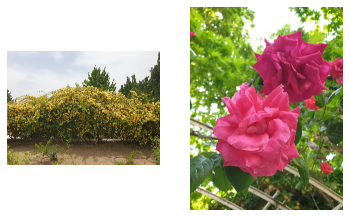

In [2]:
pic_yellow = cv.cvtColor(cv.imread('./data/Yellow.jpg'), cv.COLOR_BGR2HSV)
pic_pink = cv.cvtColor(cv.imread('./data/Pink.jpg'), cv.COLOR_BGR2HSV)

#show
fig, ax = plt.subplots(1,2)
ax[0].axis('off')
ax[1].axis('off')
ax[0].imshow(cv.cvtColor(pic_yellow,cv.COLOR_HSV2RGB))
ax[1].imshow(cv.cvtColor(pic_pink,cv.COLOR_HSV2RGB))
plt.show()

<p style='direction:rtl; text-align: right'>
در ادامه محدوده‌های رنگی به دست آمده از نمونه‌گیری‌ها را میتوانید ببینید.<br>
پس از آن توابع تبدیلات خطی مورد نظر تعریف شده است.
</p>


In [3]:
yellow_hsv_range = (38. / 2, 54. / 2)  # hsv (40, 56) degree
red_hsv_range = (345. / 2, 355. / 2)  # hsv (345, 355) degree

pink1_hsv_range = (290. / 2, 360. / 2)  # hsv (290, 360) degree
pink2_hsv_range = (0. / 2, 25. / 2)  # hsv (0, 25) degree
blue1_hsv_range = (215. / 2, 230. / 2)  # hsv (215, 230) degree
blue2_hsv_range = (230. / 2, 235. / 2)  # hsv (230, 235) degree


def linear_mapping(x, r1, r2):
    x = float(x)
    return (r2[1] - r2[0]) / (r1[1] - r1[0]) * (x - r1[0]) + r2[0]


def yellow2red(x):
    return linear_mapping(x, yellow_hsv_range, red_hsv_range)


def pink2blue(x):
    if pink1_hsv_range[0] <= x <= pink1_hsv_range[1]:
        return linear_mapping(x, pink1_hsv_range, blue1_hsv_range)
    if pink2_hsv_range[0] <= x <= pink2_hsv_range[1]:
        return linear_mapping(x, pink2_hsv_range, blue2_hsv_range)
    return x


def apply_transform(arr, transform):
    func = np.arange(256)
    func = np.vectorize(transform)(func)
    return func[arr]

<p style='direction:rtl; text-align: right'>
در ادامه، روشی که برای تبدیل گل‌های زرد توضیح داده شد، پیاده شده است.<br>
در تابع <code>yellow_condtion</code> شرط گل زرد بودن آورده شده است.
از آنجایی که غلظت رنگ گل‌ها زیاد تر است، بنابرین پیکسل‌های زرد رنگ با غلظت کم را رد میکنیم.
همچنین در گل‌ها کمی تمایل به رنگ سبز ولی با غلظت رنگ کم دیده می شود که‌آن ها را نیز در نظر می‌گیریم.<br>
در نهایت با استفاده از تابع تعریف شده، ماسک میسازیم و با اعمال فیلتر گوسی، نویز‌های موجود را از بین می‌بریم.
این نویز‌ها اغلب در لبه برگ‌ها هستند. پس با فیلتر گوسی مناسب می‌توان ضخامت آن‌ها را کم کرد.
</p>

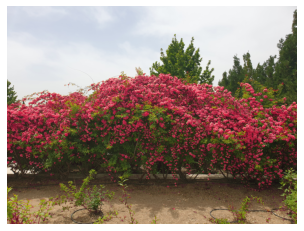

In [4]:
pic_all_red = pic_yellow.copy()

yellow_s_fade = 64. / 2
yellow_s_threshold = 0.35

pic_all_red[:, :, 0] = apply_transform(pic_all_red[:, :, 0], yellow2red)


# creating mask
def yellow_condition(p):
    h = p[0]
    s = p[1]
    if yellow_hsv_range[0] <= h <= yellow_hsv_range[1]:
        if 100 <= s <= 255:
            return np.uint8(255)
    if 54. / 2 < h:
        m = linear_mapping(h, (54. / 2, 64. / 2), (255, 0))
        if m * yellow_s_threshold <= s <= m:
            return np.uint8(255)
    return np.uint8(0)


yellow_mask = np.apply_along_axis(yellow_condition, 2, pic_yellow)

yellow_mask = cv.GaussianBlur(yellow_mask, (9, 9), 1.4)
yellow_mask = cv.threshold(yellow_mask, 180, 255, cv.THRESH_BINARY)[1]

pic_red_flower_only = cv.bitwise_and(pic_all_red, pic_all_red, mask=yellow_mask)
pic_yellow_no_flower = cv.bitwise_and(pic_yellow, pic_yellow, mask=cv.bitwise_not(yellow_mask))
pic_red = cv.add(pic_red_flower_only, pic_yellow_no_flower)

pic_red = cv.cvtColor(pic_red, cv.COLOR_HSV2BGR)
cv.imwrite('./out/res02.jpg', pic_red)

plt.axis('off')
plt.imshow(cv.cvtColor(pic_red,cv.COLOR_BGR2RGB))
plt.show()

<p style='direction:rtl; text-align: right'>
کار مشابهی را برای گل صورتی انجام می‌دهیم.
اما همانطور که گفته شد، گل های صورتی چالش کمتری دارند و با یک تبدیل ساده می‌توان رنگ گل‌ها را تغییر داد.
</p>

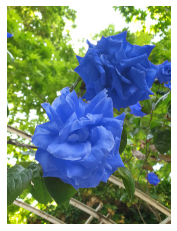

In [5]:
pic_blue = pic_pink.copy()
pic_blue[:, :, 0] = apply_transform(pic_blue[:, :, 0], pink2blue)
pic_blue = cv.cvtColor(pic_blue, cv.COLOR_HSV2BGR)

cv.imwrite('./out/res03.jpg', pic_blue)

plt.axis('off')
plt.imshow(cv.cvtColor(pic_blue,cv.COLOR_BGR2RGB))
plt.show()